In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [64]:
stock_data_bac = pd.read_csv('BAC.csv')
stock_data_bac.head()
stock_data_bac.info()
stock_data_bac.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
Date         2517 non-null object
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
Volume       2517 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,17.799889,17.979797,17.607878,17.791565,16.727805,1.202840e+08
std,7.327967,7.377956,7.286129,7.335662,7.400933,8.396856e+07
min,5.110000,5.220000,4.920000,4.990000,4.519051,1.427360e+07
25%,13.150000,13.320000,13.000000,13.150000,11.960383,6.479660e+07
50%,15.810000,16.000000,15.660000,15.820000,14.572054,9.553290e+07
75%,23.910000,24.120001,23.730000,23.910000,22.740786,1.485361e+08
max,33.680000,33.799999,33.570000,33.669998,33.669998,8.596434e+08


In [67]:
training_set=stock_data_bac['Open']
training_set=pd.DataFrame(training_set)
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(len(training_set_scaled))

[[0.35736787]
 [0.36961848]
 [0.3619181 ]
 ...
 [0.99369968]
 [0.99019958]
 [0.99299965]]


In [89]:
# Creating a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
for i in range(30, 2517-30-245):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [90]:
# Creating a data structure for testing with 30 timesteps and 1 output
X_test = []
y_test = []
for i in range(2517-30-500, 2517-30):
    X_test.append(training_set_scaled[i-30:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [25]:
# Linear regression
from sklearn.linear_model import LinearRegression
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predicted_stock_price = clfreg.predict(X_test)
predicted_stock_price = np.reshape(predicted_stock_price, (-1, 1))
predicted_stock_price_final = sc.inverse_transform(predicted_stock_price)


In [41]:
from sklearn.metrics import mean_squared_error
actual_stock_price = np.reshape(y_test, (-1, 1))
actual_stock_price_final = sc.inverse_transform(actual_stock_price)
result = mean_squared_error(actual_stock_price_final,predicted_stock_price_final)

In [42]:
print(result)

6.7299940150272075


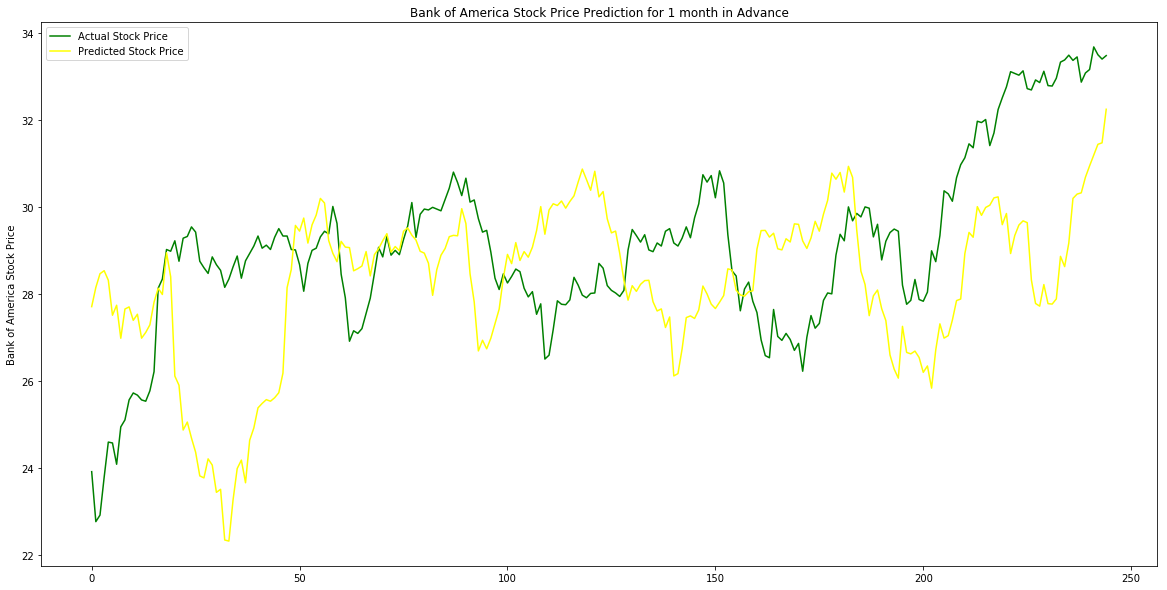

In [48]:
plt.figure(figsize=(20,10)) 
plt.plot(actual_stock_price_final,color = 'green', label = 'Actual Stock Price')
plt.plot(predicted_stock_price_final,color = 'yellow', label = 'Predicted Stock Price')
plt.title('Bank of America Stock Price Prediction for 1 month in Advance')
plt.ylabel('Bank of America Stock Price')
plt.legend()
plt.show()

In [49]:
# Creating Data for LSTM
X_train_LSTM = []
y_train_LSTM = []
for i in range(30, 2517-30-245):
    X_train_LSTM.append(training_set_scaled[i-30:i, 0])
    y_train_LSTM.append(training_set_scaled[i+30, 0])
X_train_LSTM, y_train_LSTM = np.array(X_train_LSTM), np.array(y_train_LSTM)

# Reshaping
X_train_LSTM = np.reshape(X_train_LSTM, (X_train_LSTM.shape[0], X_train_LSTM.shape[1], 1))



In [50]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [51]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_LSTM.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [52]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train_LSTM, y_train_LSTM, epochs = 20, batch_size = 32)



Epoch 1/20
2212/2212 [==============================] - 6s 3ms/step - loss: 0.0183

In [53]:
# Creating Testing Data for LSTM
# Creating a data structure for testing with 30 timesteps and 1 output
X_test_LSTM = []
y_test_LSTM = []
for i in range(2517-30-245, 2517-30):
    X_test_LSTM.append(training_set_scaled[i-30:i, 0])
    y_test_LSTM.append(training_set_scaled[i+30, 0])
X_test_LSTM, y_test_LSTM = np.array(X_test_LSTM), np.array(y_test_LSTM)

# Reshaping
X_test_LSTM = np.reshape(X_test_LSTM, (X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1))

predicted_stock_price_LSTM = regressor.predict(X_test_LSTM)
predicted_stock_price_LSTM = sc.inverse_transform(predicted_stock_price_LSTM)


In [55]:
result_LSTM = mean_squared_error(actual_stock_price_final,predicted_stock_price_LSTM)
print(result_LSTM)

5.749358231587374


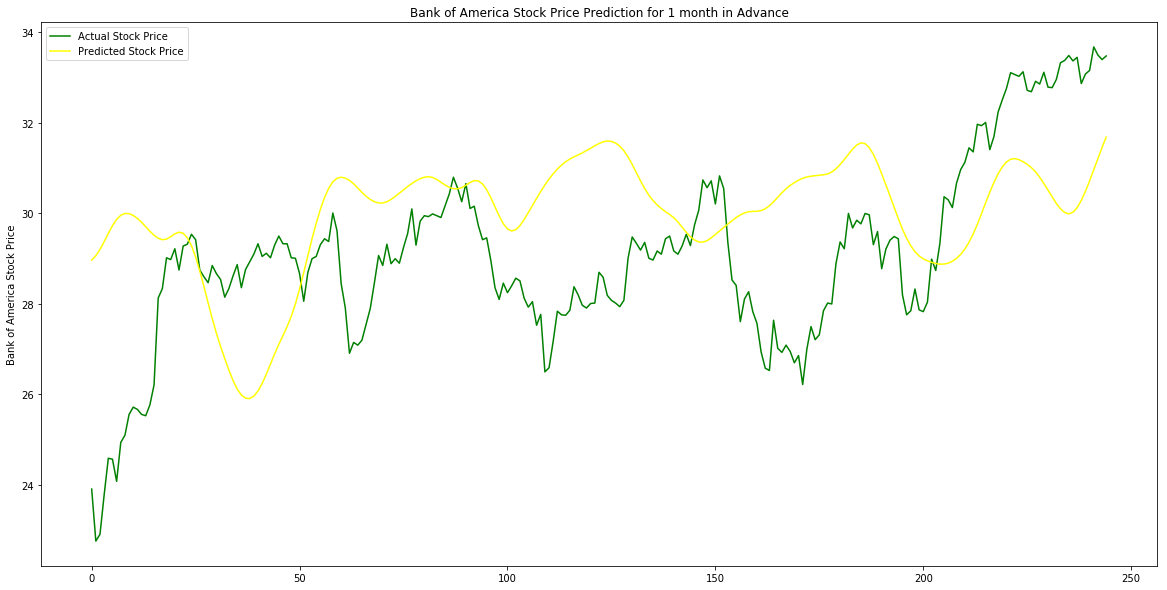

In [54]:
plt.figure(figsize=(20,10)) 
plt.plot(actual_stock_price_final,color = 'green', label = 'Actual Stock Price')
plt.plot(predicted_stock_price_LSTM,color = 'yellow', label = 'Predicted Stock Price')
plt.title('Bank of America Stock Price Prediction for 1 month in Advance')
plt.ylabel('Bank of America Stock Price')
plt.legend()
plt.show()



In [91]:
from sklearn.feature_selection import SelectFromModel
import xgboost
from xgboost import XGBRegressor

regr6 = XGBRegressor(n_estimators=1000)
   
#Passing features and target value to perform XGBoost Regression
regr6.fit(X_train, y_train)

#Predicting the output value using test data feature
#Calculating mean absolute error
#result = mean_absolute_error(numpy.expm1(test_target),numpy.expm1(regr4.predict(test_features)))

#print(result)


[19:36:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [92]:
predicted_stock_price_xgboost = regr6.predict(X_test)
predicted_stock_price_xgboost = np.reshape(predicted_stock_price_xgboost, (-1, 1))
predicted_stock_price_xgboost = sc.inverse_transform(predicted_stock_price_xgboost)


In [93]:
from sklearn.metrics import mean_squared_error
actual_stock_price = np.reshape(y_test, (-1, 1))
actual_stock_price_final = sc.inverse_transform(actual_stock_price)
result = mean_squared_error(actual_stock_price_final,predicted_stock_price_xgboost)
print(result)



0.17077902671367687


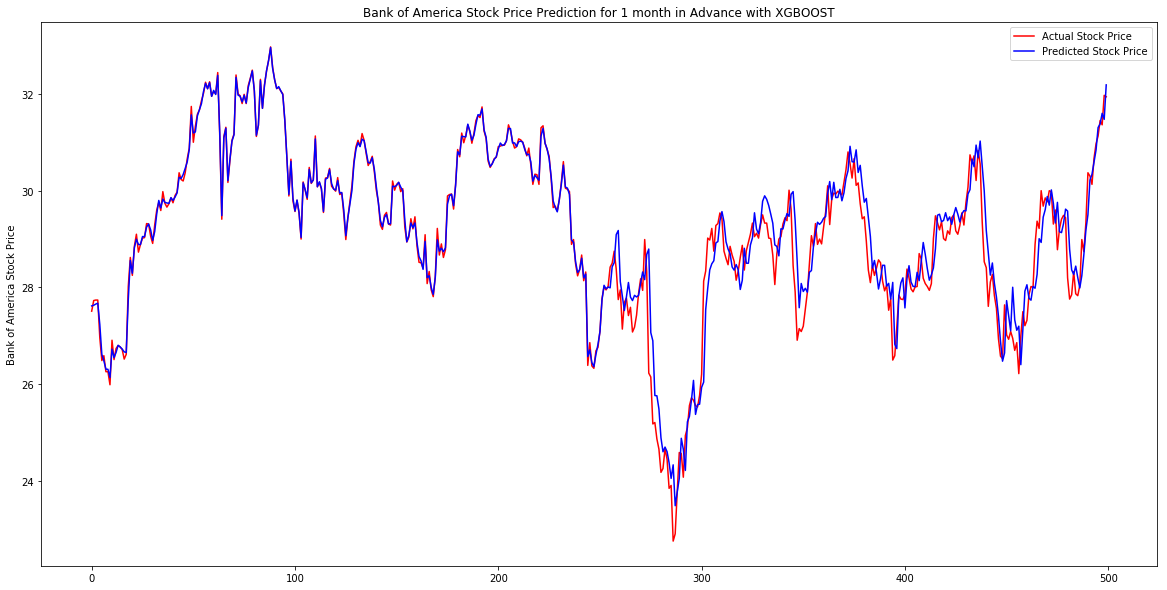

In [95]:
plt.figure(figsize=(20,10)) 
plt.plot(actual_stock_price_final,color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price_xgboost,color = 'blue', label = 'Predicted Stock Price')
plt.title('Bank of America Stock Price Prediction for 1 month in Advance with XGBOOST')
plt.ylabel('Bank of America Stock Price')
plt.legend()
plt.show()

